In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from wordcloud import WordCloud

# Download NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load structured clinical data (example)
structured_data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5],
    'Age': [34, 45, 23, 50, 40],
    'Gender': ['M', 'F', 'F', 'M', 'M'],
    'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Diabetes', 'Hypertension']
})

# Load unstructured clinical data (example - replace with your data)
unstructured_data = ["Patient with diabetes and hypertension.",
                    "Asthma patient with a history of allergies.",
                    "Patient admitted for heart failure.",
                    "Follow-up visit for diabetes management.",
                    "Patient recovering from surgery."]

In [3]:
# Check for missing values
structured_data.isnull().sum()

# Encode categorical variables (e.g., using one-hot encoding)
structured_data = pd.get_dummies(structured_data, columns=['Gender', 'Diagnosis'])

In [4]:
# Clean the text (remove punctuation, lowercase, etc.)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

unstructured_data_cleaned = [clean_text(text) for text in unstructured_data]

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
unstructured_data_tfidf = vectorizer.fit_transform(unstructured_data_cleaned)

In [5]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
structured_data_pca = pca.fit_transform(structured_data.drop('PatientID', axis=1))

# Perform clustering (e.g., KMeans)
kmeans = KMeans(n_clusters=3)
structured_data['Cluster'] = kmeans.fit_predict(structured_data.drop('PatientID', axis=1))

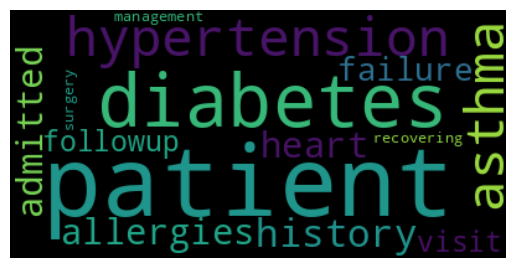

In [6]:
# Perform text clustering (using KMeans on TF-IDF vectors)
kmeans = KMeans(n_clusters=3)
unstructured_data_clusters = kmeans.fit_predict(unstructured_data_tfidf)

# Generate word clouds
wordcloud = WordCloud().generate(' '.join(unstructured_data_cleaned))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()